In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# EDA

In [3]:
df.shape

(571, 43)

In [4]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
# null values
missing_val = df.isnull().sum().to_frame("Null values")

missing_val

,Null values
Seat No.,0
PH-121,0
HS-101,0
CY-105,1
HS-105/12,1
MT-111,2
CS-105,0
CS-106,2
EL-102,2
EE-119,2


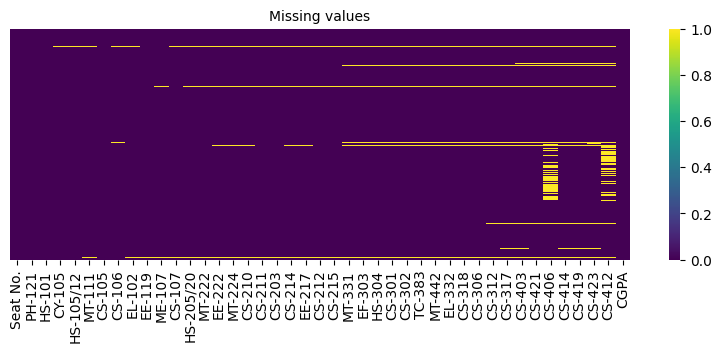

In [8]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values', fontsize=10);

In [9]:
# rows with missing values
missing_row = df[df.isnull().any(axis=1)]
missing_row

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
86,CS-97087,D,D,D+,B-,F,D,D,D,D+,...,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.261
91,CS-97092,WU,C-,D,D,WU,D,D,D,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,CS-97424,D,D+,D,D,C-,C,C+,B-,C,...,D,D,D+,D,D,W,C,B,NaN,1.747
424,CS-97425,C-,D+,B-,C+,D+,C-,A-,C-,D+,...,W,C,B-,F,D+,W,D,B,NaN,1.835
481,CS-97482,B-,A-,C+,D,B,B,A-,A-,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.896
543,CS-97544,A,B,A,A-,A-,A,B+,B+,B+,...,WU,NaN,NaN,W,WU,NaN,NaN,NaN,W,3.607


In [10]:
#Drop rows with many missing values
null_count_per_row = df.isnull().sum(axis=1)
df['Null_Count'] = null_count_per_row

null_count_per_row.sort_values(ascending=False).head(15)

44     36
565    35
142    31
137    30
143    30
60     24
288    24
281    20
91     19
282    14
481     9
86      7
543     5
388     1
375     1
dtype: int64

In [11]:
len(df)

571

In [12]:
#  five percent threshold
threshold = len(df) * 0.04
print('threshold :', threshold)

threshold : 22.84


# Dropping rows with more than or equal to 20 missing values

In [13]:
display( "Rows with more than 20 missing values: \n", df[df['Null_Count'] >= 20 ])



'Rows with more than 20 missing values: \n'

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Null_Count
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493,36
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418,24
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653,30
142,CS-97143,C+,B-,B,A-,A,A-,C,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943,31
143,CS-97144,D,D,WU,WU,WU,D,WU,WU,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,30
281,CS-97282,WU,D+,F,F,F,D,NaN,D,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092,20
288,CS-97289,D,C-,D,C,D,D,B-,F,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998,24
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800,35


In [14]:
# Drop rows with more than 20 missing values
df = df[df['Null_Count'] <= 19]

print(f"The rows and columns in the dataset: {df.shape}")

The rows and columns in the dataset: (563, 44)


In [15]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

# Filter only columns with missing values
missing_val[missing_val['Null values']>0]

,Null values,% of missing
EE-119,1,0.18
MT-331,1,0.18
EF-303,2,0.36
HS-304,2,0.36
CS-301,2,0.36
CS-302,2,0.36
TC-383,2,0.36
MT-442,2,0.36
EL-332,1,0.18
CS-318,1,0.18


In [16]:
# Selecting the columns with missing values
columns_with_missingval = df.columns[df.isnull().any()]
columns_with_missingval

Index(['EE-119', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [17]:
# Inspect the values present in each column with missing values
for column in columns_with_missingval:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")

Feature EE-119:
EE-119
A-    134
B+     83
B      77
A      68
B-     48
C      48
C+     38
C-     26
D+     24
D      10
A+      6
Name: count, dtype: int64

Feature MT-331:
MT-331
A     118
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: count, dtype: int64

Feature EF-303:
EF-303
B     112
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: count, dtype: int64

Feature HS-304:
HS-304
A-    128
B      72
B-     70
B+     66
C      58
C+     53
C-     33
A      28
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: count, dtype: int64

Feature CS-301:
CS-301
A-    108
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: count, dtype: int64

Feature CS-302:
CS-302
A-    113
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: c

In [18]:
# replace missing values with the mode
for column in columns_with_missingval:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)

In [19]:
# null values
missing_val = df.isnull().sum().to_frame("Null values")
missing_val

,Null values
Seat No.,0
PH-121,0
HS-101,0
CY-105,0
HS-105/12,0
MT-111,0
CS-105,0
CS-106,0
EL-102,0
EE-119,0


# Feature analysis

In [20]:
# Drop the "Null_Count" column
df.drop("Null_Count", axis=1, inplace=True)

In [21]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

,No. of unique values,type
Seat No.,563,object
PH-121,12,object
HS-101,11,object
CY-105,11,object
HS-105/12,11,object
MT-111,13,object
CS-105,11,object
CS-106,11,object
EL-102,11,object
EE-119,11,object


In [22]:
# Dropping the column seat no
df.drop(['Seat No.'], axis=1, inplace=True)
df.sample(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
526,B,C,A-,C,B-,B+,B-,D,B-,C+,...,B+,B-,B+,C,D+,C,B+,B,B,2.659
97,A,B-,A,A-,B-,A-,B-,A-,A-,A-,...,C,B+,C+,C+,A-,A,A-,A-,A-,3.258
386,D,C+,C,C-,B-,C-,C+,B,C-,A,...,A,C+,A,C,A-,B+,B-,A-,B+,2.611
348,D,D,D,D,C-,C-,C-,C+,C,D,...,A,D+,C+,D,C-,B,D+,B+,A-,2.084
389,B+,B,A,B-,B+,B+,B+,A+,B,B-,...,A+,B,B,B-,B,A,B+,A-,A-,3.245
364,B-,D+,A-,B,A,C,B,A-,C+,C,...,A+,A-,A-,B,A-,A,A-,A,A,3.226
528,A,B+,A,A,A-,A,A,A,A,A,...,A,B+,A,A,A,B,A-,B,A-,3.734
5,A,B-,B,D+,C+,A-,C+,B,B+,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
549,A-,C,A,A,B,B,B-,C-,B-,C,...,B+,B-,A,B,B-,B,B,B-,B-,2.860
492,B+,B-,A-,B+,B,B+,C,B,A-,B+,...,C+,C+,A-,C,C,C-,B-,C,C,2.602


In [23]:
df.shape

(563, 42)

In [24]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [25]:
# Summary statistics of numerical columns
stats = df.describe()
stats

,CGPA
count,563.000000
mean,2.973080
std,0.598085
min,1.261000
25%,2.558000
50%,3.037000
75%,3.455000
max,3.985000


In [26]:
# non numeric columns
df.describe(exclude=[np.number])

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,563,563,563,563,563,563,563,563,563,563,...,563,563,563,563,563,563,563,563,563,563
unique,12,11,11,11,13,11,11,11,11,11,...,13,14,12,11,13,14,13,12,12,13
top,A-,A-,A,A,A-,A,A-,A-,A-,A-,...,A-,A+,B-,A,B,A-,A,A-,A-,A-
freq,112,82,177,96,105,151,116,105,135,79,...,121,95,83,137,90,254,181,125,128,228


In [27]:
# duplicated values
df[df.duplicated()].shape

(0, 42)

# Data visualisation

Skewness of CGPA: -0.3649194815299165


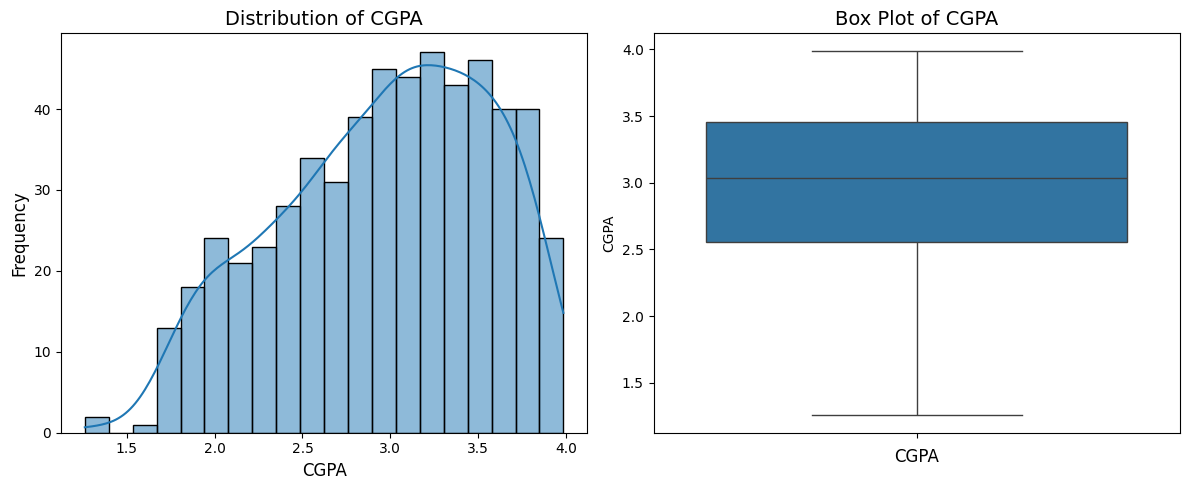

In [28]:
# Create a figure and axes with different style
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_palette("pastel")  # Set a different color palette

# Plot a distribution plot (histogram + KDE)
sns.histplot(df['CGPA'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('Distribution of CGPA', size=14)
axes[0].set_xlabel('CGPA', size=12)
axes[0].set_ylabel('Frequency', size=12)

# Plot a boxplot
sns.boxplot(df['CGPA'], ax=axes[1])
axes[1].set_title('Box Plot of CGPA', size=14)
axes[1].set_xlabel('CGPA', size=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the skewness of CGPA
print(f"Skewness of CGPA: {df['CGPA'].skew()}")

# Display the plots
plt.show()

In [29]:
#Categorical columns
cat_col = df.columns[:-1]
cat_col

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [30]:
# Get all the possible unique values in the dataset features
arr = []

for col in cat_col:
    arr.extend(df[col].unique())

pd.Series(arr).unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F', 'W'], dtype=object)

In [31]:
# Transform to ordered categories
order_cat = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'WU', 'W' ]

for col in cat_col:
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

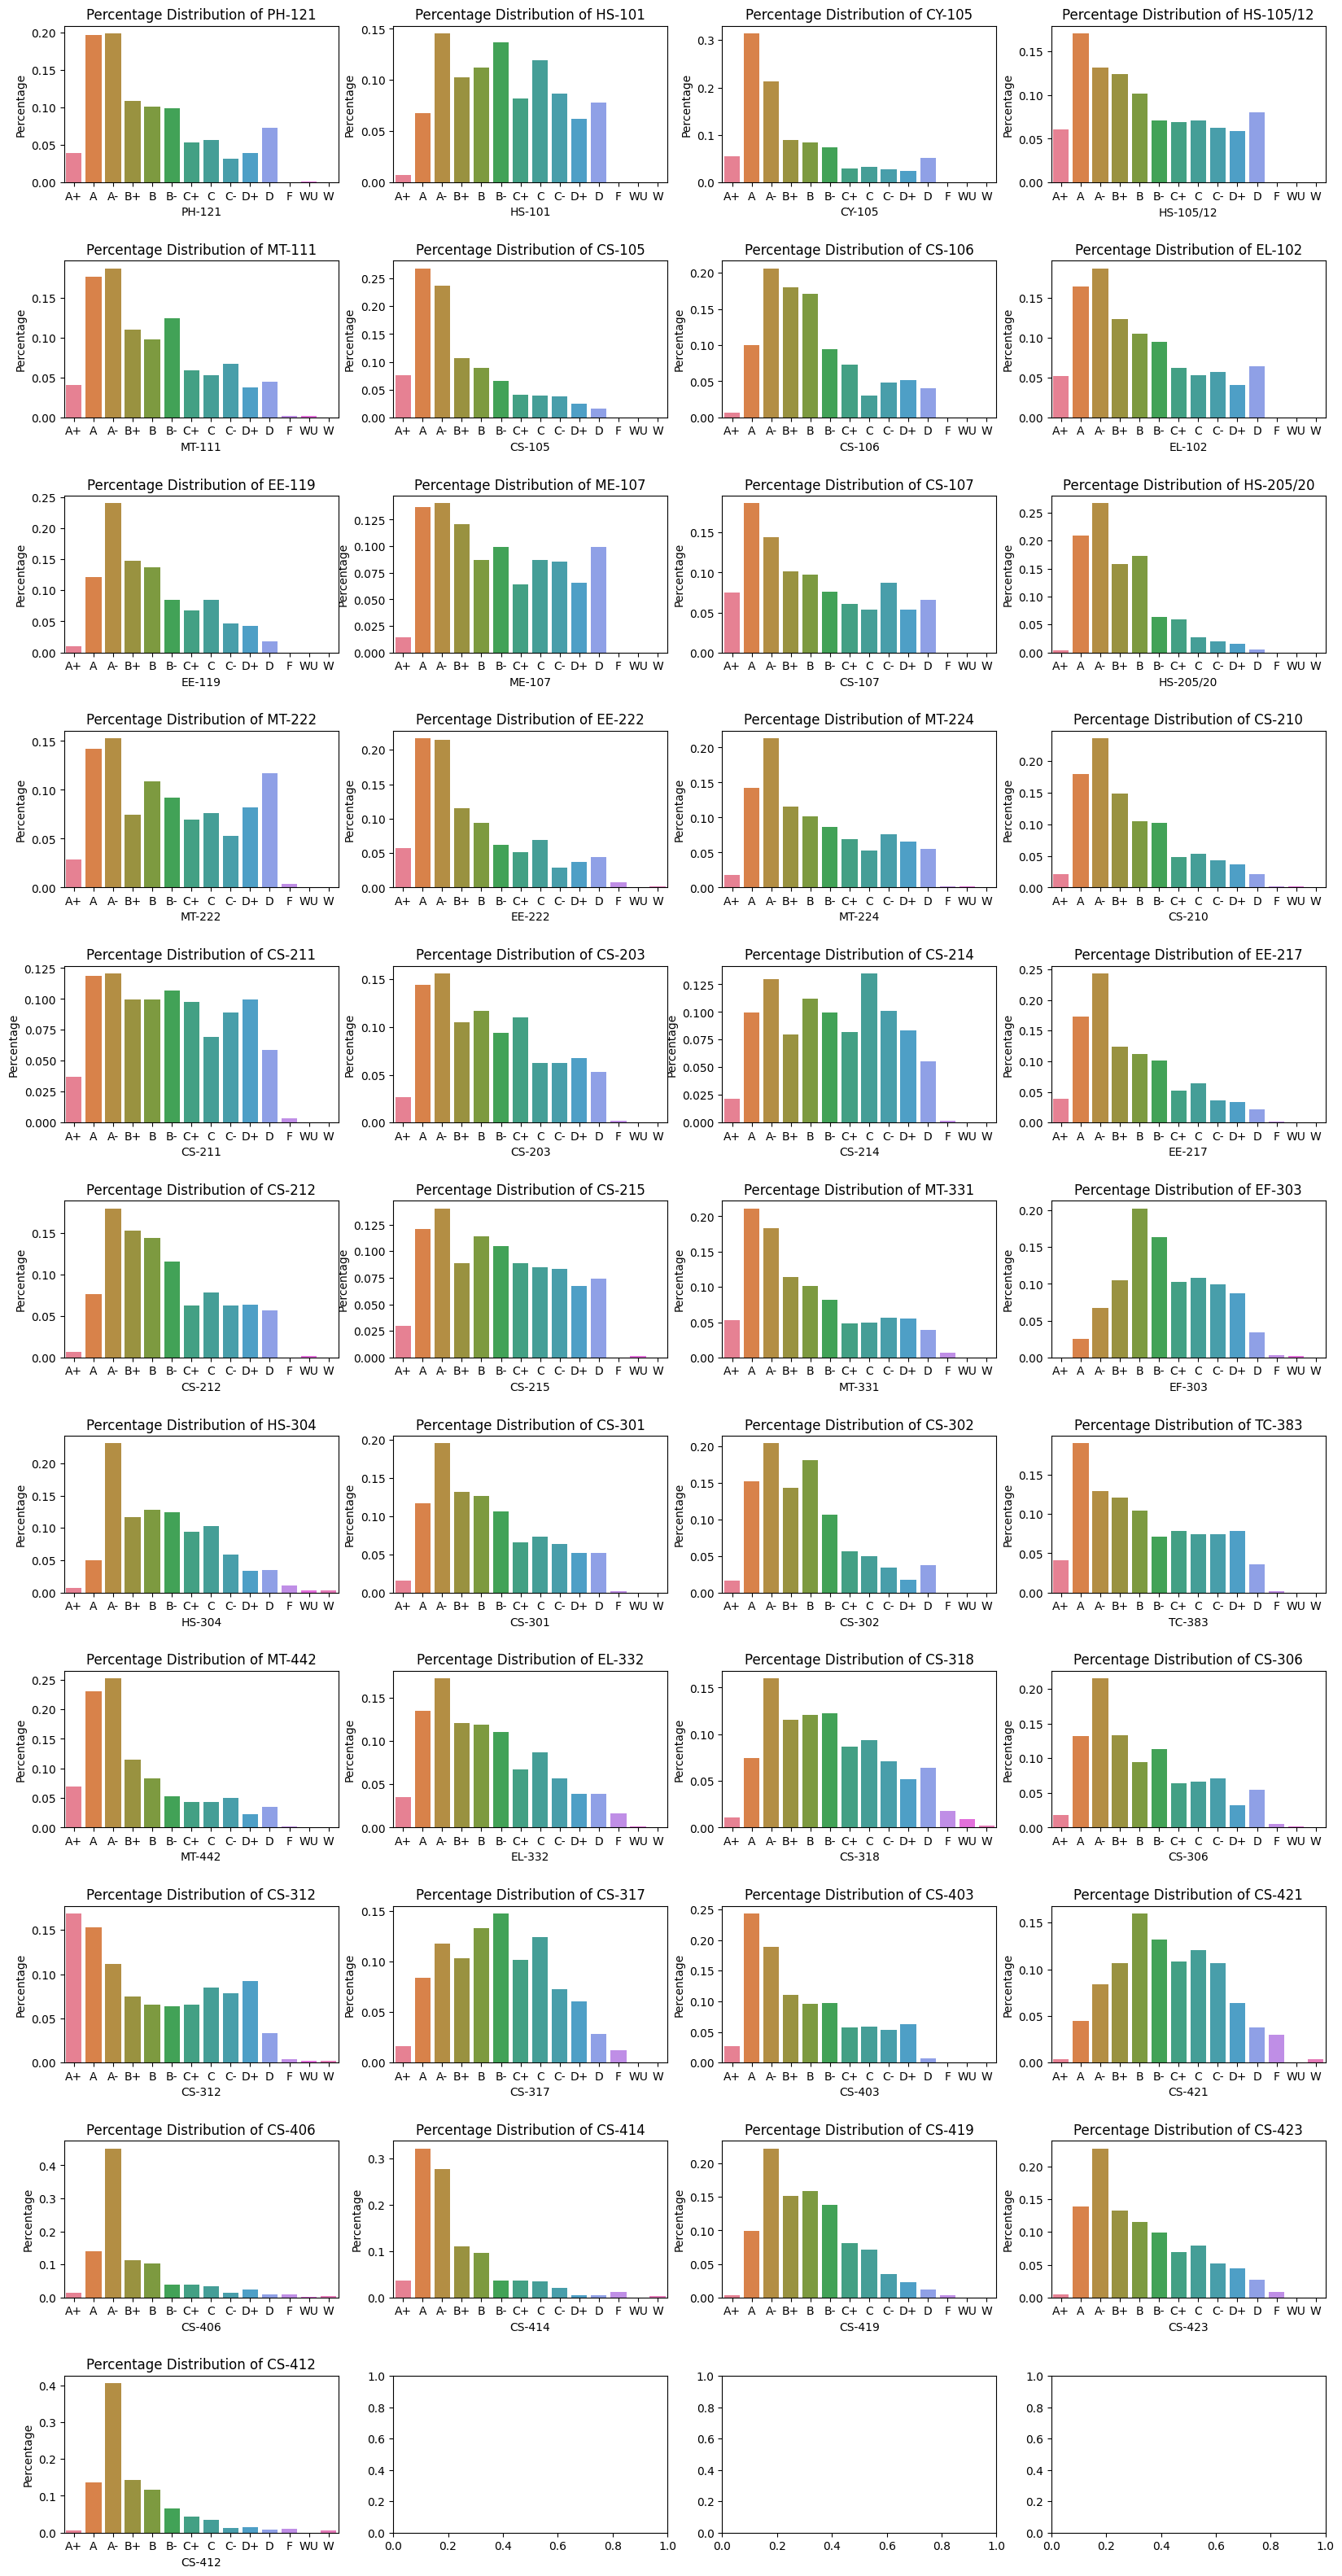

In [32]:
fig, axs = plt.subplots(11, 4, figsize=(20, 40))

for ax, column in zip(axs.flat, cat_col):
    total = float(len(df[column]))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts() / total, ax=ax, palette='husl')
    ax.set_title(f"Percentage Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [33]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in cat_col:
    df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     563 non-null    float64
 1   HS-101     563 non-null    float64
 2   CY-105     563 non-null    float64
 3   HS-105/12  563 non-null    float64
 4   MT-111     563 non-null    float64
 5   CS-105     563 non-null    float64
 6   CS-106     563 non-null    float64
 7   EL-102     563 non-null    float64
 8   EE-119     563 non-null    float64
 9   ME-107     563 non-null    float64
 10  CS-107     563 non-null    float64
 11  HS-205/20  563 non-null    float64
 12  MT-222     563 non-null    float64
 13  EE-222     563 non-null    float64
 14  MT-224     563 non-null    float64
 15  CS-210     563 non-null    float64
 16  CS-211     563 non-null    float64
 17  CS-203     563 non-null    float64
 18  CS-214     563 non-null    float64
 19  EE-217     563 non-null    float64
 20  CS-212     563 

In [35]:
# Statistical summary
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,...,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,3.706927,5.037300,2.818828,4.193606,3.852575,2.781528,4.076377,3.893428,3.856128,4.740675,...,4.115453,4.833037,3.481350,5.419183,2.998224,2.431616,3.882771,3.994671,3.063943,2.973080
std,2.994254,2.776431,2.863912,3.156053,2.935476,2.649826,2.677744,2.962880,2.620527,3.110120,...,3.366016,2.759747,2.973356,2.733434,2.483038,2.500575,2.389279,2.805366,2.345473,0.598085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.261000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.558000
50%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.037000
75%,6.000000,7.000000,4.000000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,7.500000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.455000
max,11.000000,10.000000,10.000000,10.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [36]:
# CORRELTION
cor = df.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.367320,0.545536,0.492560,0.463522,0.594735,0.283754,0.412651,0.579684,0.529884,...,0.062330,0.474040,0.361433,0.321141,0.297413,0.181377,0.495860,0.115261,0.312791,-0.646768
HS-101,0.367320,1.000000,0.322420,0.468455,0.430553,0.386147,0.309317,0.347651,0.303261,0.331029,...,0.228396,0.367264,0.248711,0.317739,0.273599,0.241924,0.298666,0.240124,0.234347,-0.527358
CY-105,0.545536,0.322420,1.000000,0.484819,0.518543,0.572274,0.350541,0.423403,0.478764,0.468966,...,0.300088,0.490553,0.521577,0.391352,0.146833,0.036282,0.472240,0.146271,0.080401,-0.652520
HS-105/12,0.492560,0.468455,0.484819,1.000000,0.476326,0.478896,0.486297,0.343963,0.407846,0.318189,...,0.284477,0.488093,0.483809,0.440631,0.178057,0.161648,0.489345,0.251730,0.163703,-0.618464
MT-111,0.463522,0.430553,0.518543,0.476326,1.000000,0.387020,0.496277,0.546270,0.405271,0.463756,...,0.496590,0.568246,0.442577,0.540597,0.314389,0.250606,0.529284,0.422971,0.283843,-0.744437
CS-105,0.594735,0.386147,0.572274,0.478896,0.387020,1.000000,0.280712,0.349451,0.497964,0.445657,...,0.081633,0.395994,0.314415,0.262750,0.252527,0.146914,0.332923,0.061838,0.194357,-0.588928
CS-106,0.283754,0.309317,0.350541,0.486297,0.496277,0.280712,1.000000,0.320171,0.288362,0.289324,...,0.481106,0.426229,0.461787,0.424934,0.139983,0.129266,0.448336,0.362224,0.198672,-0.543241
EL-102,0.412651,0.347651,0.423403,0.343963,0.546270,0.349451,0.320171,1.000000,0.455678,0.462935,...,0.333089,0.479393,0.342732,0.402094,0.270133,0.273043,0.410198,0.397678,0.283914,-0.653654
EE-119,0.579684,0.303261,0.478764,0.407846,0.405271,0.497964,0.288362,0.455678,1.000000,0.558249,...,0.171739,0.454307,0.366065,0.379060,0.308969,0.231342,0.486960,0.258877,0.333263,-0.646254
ME-107,0.529884,0.331029,0.468966,0.318189,0.463756,0.445657,0.289324,0.462935,0.558249,1.000000,...,0.216346,0.470513,0.360832,0.365278,0.311917,0.170227,0.460440,0.234777,0.305232,-0.665141


In [37]:
# Listing the correlation coeficients with the target variable
df_corr = cor.unstack().sort_values(ascending=False).reset_index()
df_corr.columns = ['Feature A', 'Feature B', 'Corr coef']
df_corr[(df_corr['Feature A'] == 'CGPA')]

,Feature A,Feature B,Corr coef
11,CGPA,CGPA,1.000000
1683,CGPA,CS-414,-0.433539
1685,CGPA,HS-205/20,-0.459370
1686,CGPA,CS-412,-0.501996
1689,CGPA,CS-406,-0.508544
1690,CGPA,CS-312,-0.509667
1692,CGPA,HS-101,-0.527358
1694,CGPA,EF-303,-0.540283
1696,CGPA,CS-106,-0.543241
1698,CGPA,CS-423,-0.567965


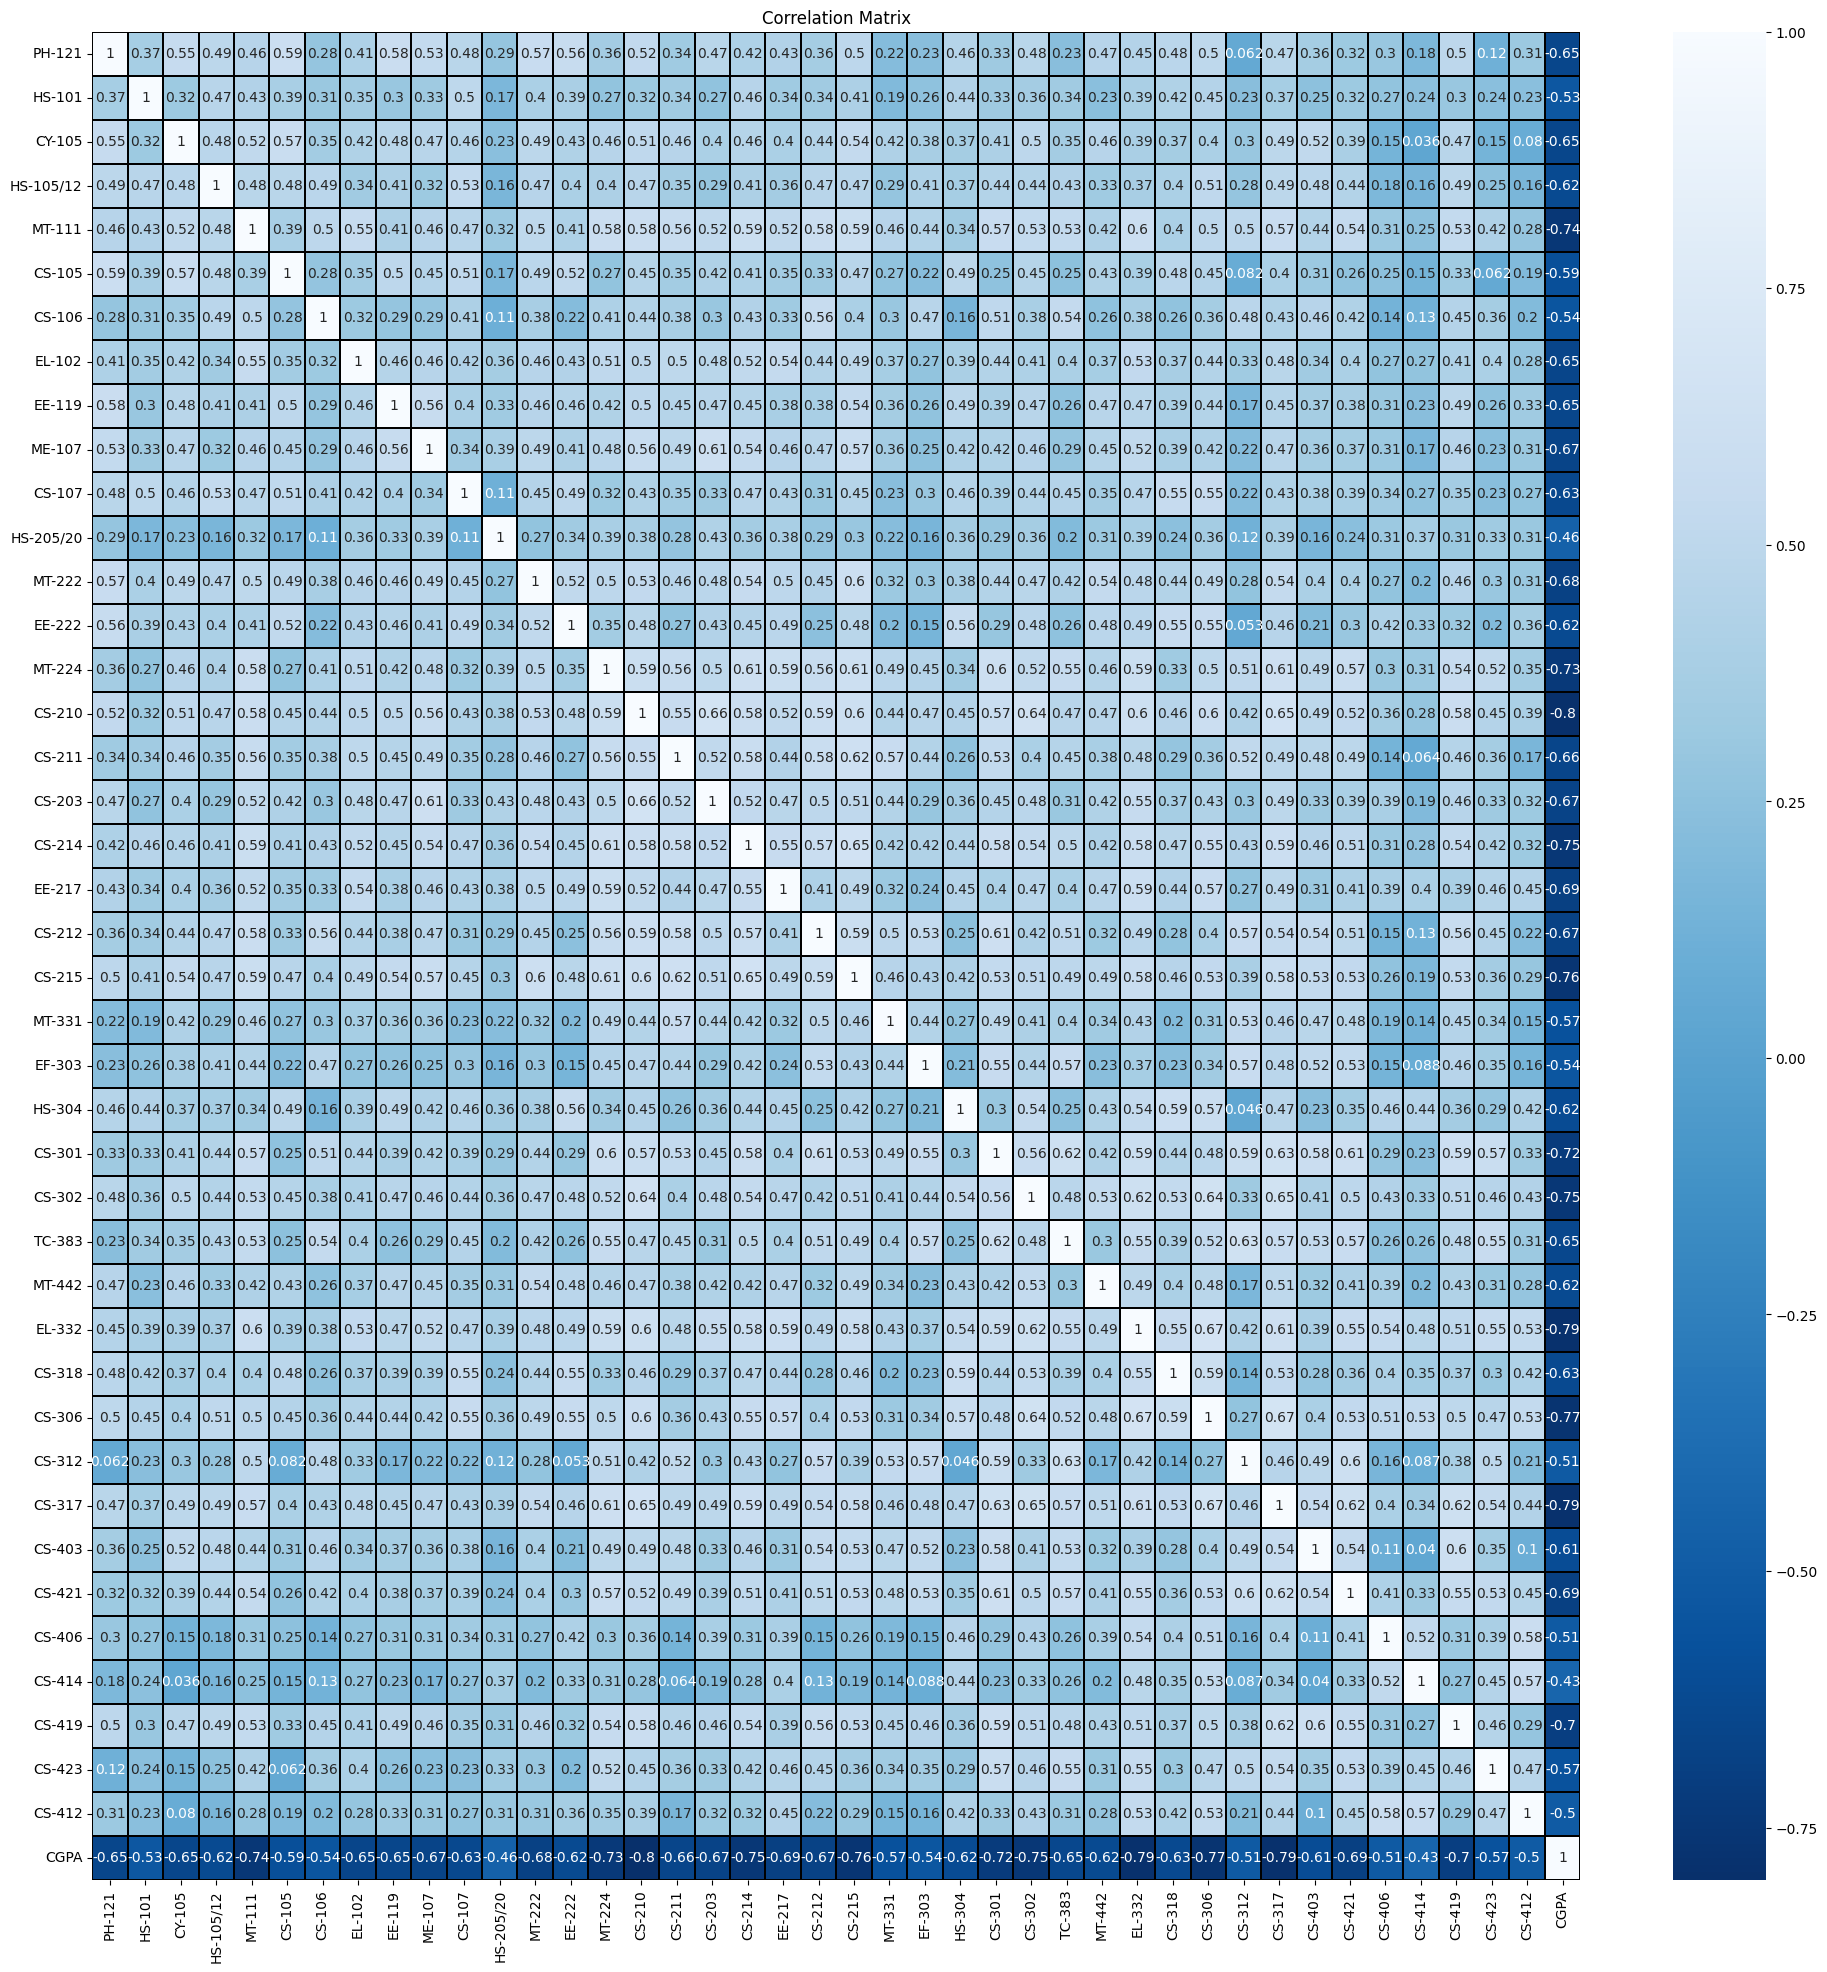

In [38]:
# heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2g", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

In [39]:
#OUTLIERS

# zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.432235,1.789028,1.810733,0.572868,1.414119,2.726553,1.840356,1.387239,0.436893,1.048906,...,1.155075,1.148576,1.521065,0.945006,0.402375,0.973287,1.724742,0.354876,0.454019,1.285374
1,1.239115,1.428533,2.509699,1.524267,0.391230,1.215678,1.840356,1.315237,2.346602,1.370723,...,1.749778,1.511250,0.847827,1.311172,0.402375,1.028030,0.886925,0.715455,0.027287,1.615051
2,1.239115,0.734436,0.985133,0.255734,0.050266,1.050635,0.345233,0.036001,0.708933,0.881996,...,0.331681,0.664796,1.171890,0.212675,1.208556,0.973287,1.626526,0.711652,1.307484,1.062532
3,1.769315,0.707543,2.509699,1.524267,1.755083,0.295198,2.214137,1.387239,1.964660,0.727089,...,1.749778,0.423227,2.194304,0.945006,0.806897,0.227503,1.305834,1.072231,1.679643,1.785747
4,0.570575,1.094931,0.286167,0.061399,1.313587,1.050635,0.776110,0.036001,1.472817,0.881996,...,0.263021,0.302121,0.174588,0.153490,0.402375,0.973287,0.788709,0.711652,1.307484,0.794774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.236305,1.815921,0.985133,0.695665,0.972623,1.050635,0.776110,0.639618,1.090875,0.238362,...,0.629033,1.027470,1.171890,1.984318,1.208556,0.627767,0.049108,0.354876,1.307484,1.380495
567,0.904845,1.815921,0.985133,1.329932,1.313587,1.050635,1.523671,0.639618,1.472817,1.525630,...,0.034330,0.302121,1.171890,1.984318,0.402375,0.227503,0.788709,0.715455,0.454019,1.336985
568,0.236305,1.815921,0.286167,0.061399,1.313587,1.050635,1.523671,1.315237,1.472817,0.560179,...,0.629033,0.664796,1.171890,0.519656,1.208556,1.428294,0.049108,0.711652,0.454019,0.831591
569,1.239115,0.373941,2.160216,1.329932,1.755083,2.726553,0.345233,1.387239,0.436893,1.048906,...,1.452427,0.664796,0.162032,0.945006,2.419260,1.428294,0.369800,0.358678,1.252911,1.305456


In [40]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

32 rows with outliers were deleted.
This represent 5.68% of the data.
In the new dataset there are 531 rows and 42 columns.


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.0,9.0,0.0,6.0,4.0,4.0,6.0,2.0,5.0,9.0,...,3.0,7.0,4.0,10.0,6.0,8.0,3.0,6.0,5.0,2.607
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470


In [41]:
# skewness
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
CS-406,1.370342
CS-105,0.986982
CY-105,0.980510
CS-412,0.888078
MT-442,0.886627
CS-414,0.886322
EE-222,0.758984
EE-217,0.740554
CS-210,0.669479
MT-331,0.660546


In [43]:
skewed_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skewed_columns = sorted(skewed_columns)
skewed_columns

['CS-105',
 'CS-106',
 'CS-210',
 'CS-302',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-119',
 'EE-217',
 'EE-222',
 'EL-102',
 'HS-205/20',
 'MT-331',
 'MT-442',
 'PH-121']

In [49]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skewed_columns:
    df_transformed[f"{col}_cbrt"] = np.sqrt(df[col])
df_transformed = pd.concat([df_transformed, df[skewed_columns]], axis=1)

In [54]:
# Comparing skewness for transformed dataframe
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

df_comp.reset_index(inplace=True)
df_comp['Feature'] = df_comp['index'].str.extract(r'^([A-Z]+-\d+)')

# Calculate absolute skewness
df_comp['Abs_Skewness'] = abs(df_comp['Skewness'])

ph_121_skewness = df_comp[df_comp['Feature'] == 'PH-121']
display(ph_121_skewness)

df_comp.dropna(subset=['Skewness'], inplace=True)

min_skew_indices = df_comp.groupby('Feature')['Abs_Skewness'].idxmin()
low_skewness_features = df_comp.loc[min_skew_indices]

low_skewness_features

,index,Skewness,Feature,Abs_Skewness
0,PH-121_cbrt,-0.392802,PH-121,0.392802
1,PH-121,0.617799,PH-121,0.617799


,index,Skewness,Feature,Abs_Skewness
32,CS-105_cbrt,-0.116191,CS-105,0.116191
31,CS-106,0.648658,CS-106,0.648658
28,CS-210_cbrt,-0.542833,CS-210,0.542833
27,CS-302,0.612661,CS-302,0.612661
24,CS-403_cbrt,-0.346880,CS-403,0.346880
22,CS-406_cbrt,-0.449519,CS-406,0.449519
20,CS-412_cbrt,-0.720184,CS-412,0.720184
18,CS-414_cbrt,-0.148934,CS-414,0.148934
16,CY-105_cbrt,-0.009490,CY-105,0.009490
15,EE-119,0.596617,EE-119,0.596617


In [58]:
# Filter columns where index is different from feature
sqrt_columns = low_skewness_features[low_skewness_features['index'] != low_skewness_features['Feature']]

# filtered DataFrame
display(sqrt_columns)
sqrt_columns = sqrt_columns[~sqrt_columns['Feature'].str.contains('HS-205', case=False)]
sqrt_columns_to_transform = sqrt_columns['Feature'].tolist()

sqrt_columns_to_transform

,index,Skewness,Feature,Abs_Skewness
32,CS-105_cbrt,-0.116191,CS-105,0.116191
28,CS-210_cbrt,-0.542833,CS-210,0.542833
24,CS-403_cbrt,-0.346880,CS-403,0.346880
22,CS-406_cbrt,-0.449519,CS-406,0.449519
20,CS-412_cbrt,-0.720184,CS-412,0.720184
18,CS-414_cbrt,-0.148934,CS-414,0.148934
16,CY-105_cbrt,-0.009490,CY-105,0.009490
12,EE-217_cbrt,-0.480950,EE-217,0.480950
10,EE-222_cbrt,-0.290472,EE-222,0.290472
8,EL-102_cbrt,-0.494906,EL-102,0.494906


['CS-105',
 'CS-210',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-217',
 'EE-222',
 'EL-102',
 'MT-331',
 'MT-442',
 'PH-121']

In [61]:
sqrt_columns_to_transform

['CS-105',
 'CS-210',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-217',
 'EE-222',
 'EL-102',
 'MT-331',
 'MT-442',
 'PH-121']

In [62]:
# Update the df dataset with the transfor data with square root method.
for col in sqrt_columns_to_transform:
    df[col] = np.sqrt(df[col])

In [63]:
# new skewness for the transformed columns
df[sqrt_columns_to_transform].skew()

CS-105   -0.116191
CS-210   -0.542833
CS-403   -0.346880
CS-406   -0.449519
CS-412   -0.720184
CS-414   -0.148934
CY-105   -0.009490
EE-217   -0.480950
EE-222   -0.290472
EL-102   -0.494906
MT-331   -0.331705
MT-442   -0.213874
PH-121   -0.392802
dtype: float64

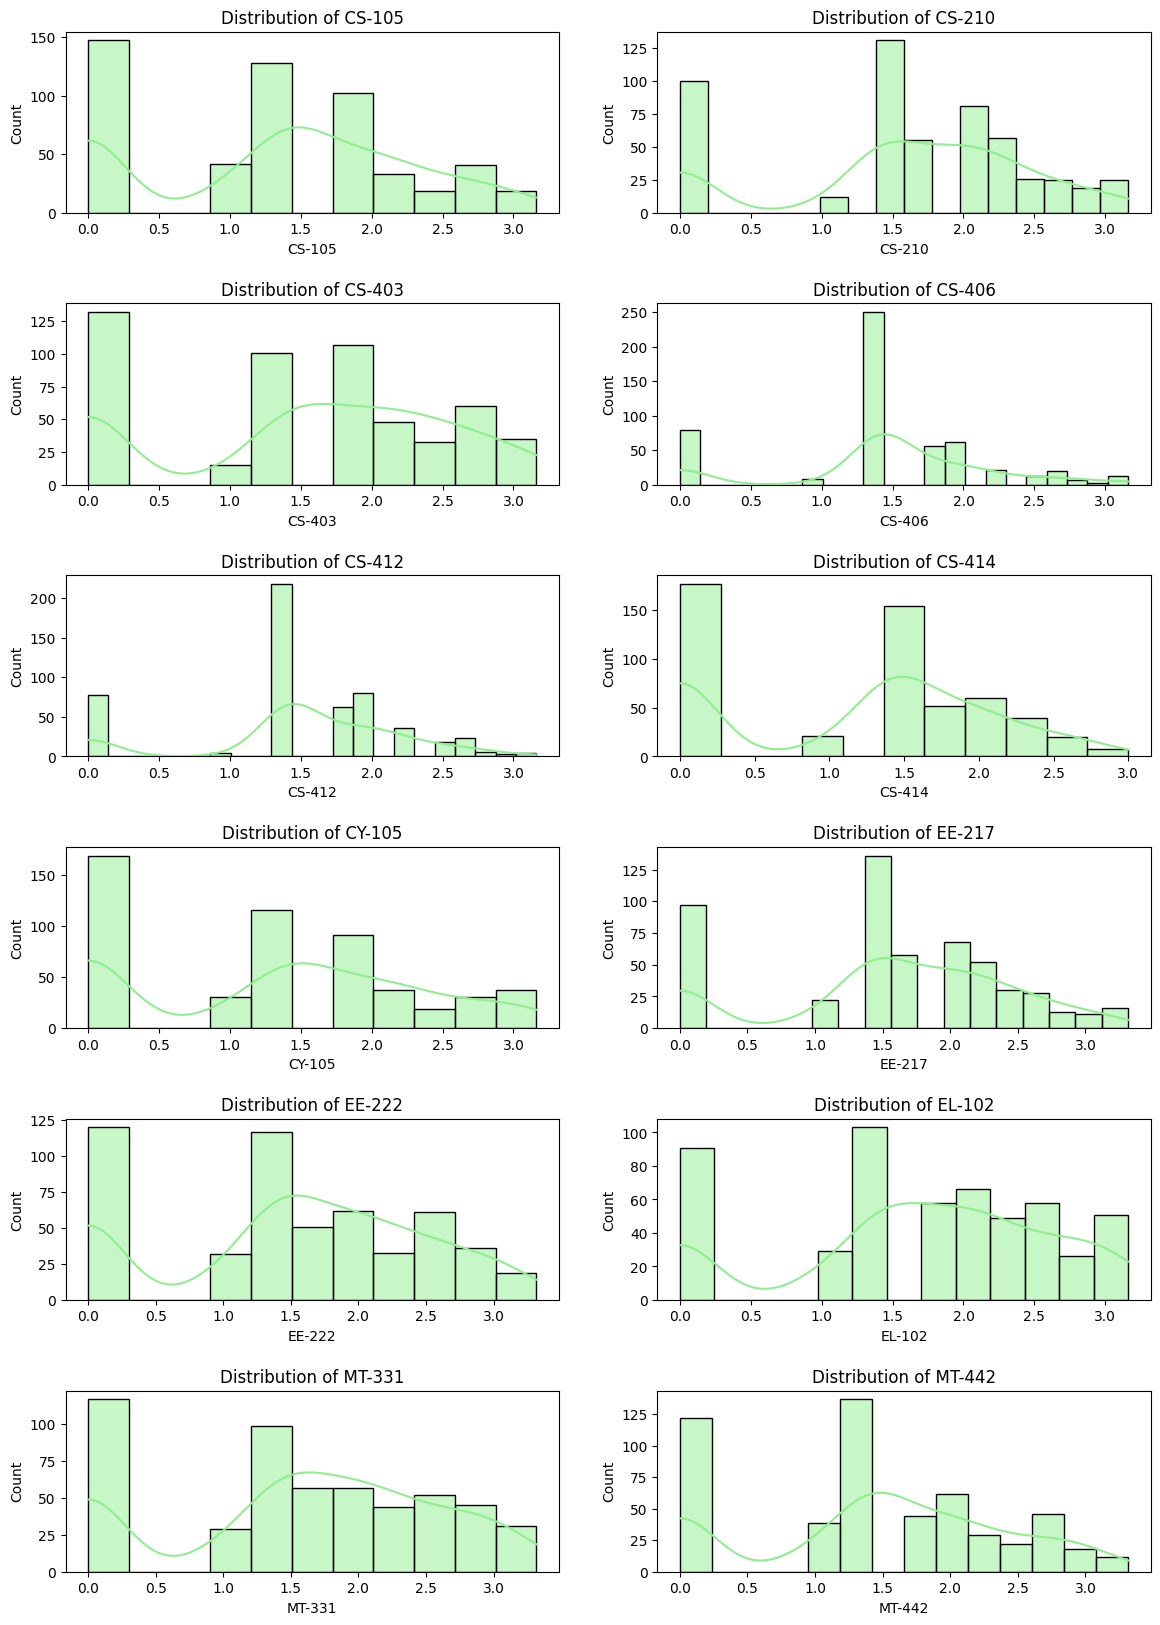

In [64]:
# Visualizing the distribution
fig, axs = plt.subplots(6, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, sqrt_columns_to_transform):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='lightgreen')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [66]:
# Separating the features and target
x = df.drop("CGPA", axis=1)
y = df['CGPA']

print(f"Feature  = {x.shape}")
print(f"Label  = {y.shape}")

Feature  = (531, 41)
Label  = (531,)


In [67]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
35,CS-421,12.690136
33,CS-317,12.507452
15,CS-210,11.319631
20,CS-212,10.686261
18,CS-214,10.254833
21,CS-215,10.060446
25,CS-301,9.670698
40,CS-412,9.576716
31,CS-306,9.559942
24,HS-304,9.536196


In [68]:
# Dropping the columns with multicollinearity
x = x.drop(['CS-212','CS-421','CS-317','CS-210','CS-214'], axis=1)

In [69]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
21,HS-304,9.420928
18,CS-215,9.410375
22,CS-301,9.333164
35,CS-412,9.114559
15,CS-211,8.903973
28,CS-306,8.870447
26,EL-332,8.858050
33,CS-419,8.771537
27,CS-318,8.671933
29,CS-312,8.327466


# Modeling

In [76]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [71]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i

    return [best_random_state, best_acc]


# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y)
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.9807 at random_state 102


In [73]:
random_state

102

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (371, 36)
x_test shape:   (160, 36)
y_train shape:  (371,)
y_test shape:   (160,)


In [101]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [104]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Display the coefficients, intercept, and scores
print("Linear Regression coefficients:", model.coef_)
print("Linear Regression intercept:", model.intercept_)
print("Training score (R2):", model.score(x_train, y_train))
print("Test score (R2):", model.score(x_test, y_test))

# Predict the values
predictions = model.predict(x_test)

#  cross-validation
cross_val_scores = cross_val_score(model, x, y, cv=10, scoring='r2')
mse_value = mean_squared_error(y_test, predictions)
r2_test_score = r2_score(y_test, predictions)
rmse_value = np.sqrt(mse_value)

print("********** ERROR METRICS **********")
print(f"Mean Squared Error: {mse_value:.4f}")
print(f"Root Mean Squared Error: {rmse_value:.4f}")
print(f"Cross-validation R2 scores: {cross_val_scores}")
print(f"Average R2 from Cross-validation: {cross_val_scores.mean():.4f}")
print(f"R2 Score on Test Data: {r2_test_score:.4f}")

# Save the model scores
model_evaluation = {
    'Model': 'Linear Regression',
    'Instance': model,
    'RMSE': rmse_value,
    'R2_Score (Test)': r2_test_score,
    'Cross-val Mean R2': cross_val_scores.mean()
}

eval_model_df = pd.DataFrame([model_evaluation])
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

Linear Regression coefficients: [-0.01284258 -0.00267625 -0.02500854 -0.0099617  -0.00930265 -0.01073112
 -0.00458611 -0.0167701  -0.01305945 -0.01291011 -0.00948235 -0.00975806
 -0.00982205 -0.02088494 -0.00640467 -0.00487684 -0.01110673 -0.02829442
 -0.01146555 -0.0199845  -0.00756965 -0.01256182 -0.01621737 -0.01601219
 -0.0029655  -0.00545038 -0.01263402 -0.00567661 -0.02388687 -0.01180978
 -0.01237571 -0.02270379 -0.01859708 -0.0118216  -0.00596924  0.00071733]
Linear Regression intercept: 4.286973503465855
Training score (R2): 0.9743110103237528
Test score (R2): 0.9806835135161496
********** ERROR METRICS **********
Mean Squared Error: 0.0066
Root Mean Squared Error: 0.0809
Cross-validation R2 scores: [0.97552491 0.96955268 0.98031057 0.98363616 0.96828601 0.95950173
 0.97067957 0.96792119 0.97603319 0.95654577]
Average R2 from Cross-validation: 0.9708
R2 Score on Test Data: 0.9807


In [106]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor model
rfr_model = RandomForestRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 600, 1000],  # Number of trees in the forest
    'max_features': ['auto'],  # Number of features to consider when looking for the best split
    'max_depth': [None, 40, 50, 60],  # Maximum depth of the trees
    'min_samples_split': [5, 7, 9],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [7, 10, 12],  # Minimum number of samples required to be at a leaf node
    'criterion': ['squared_error'],  # Function to measure the quality of a split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Set up the GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)


KeyboardInterrupt: 

In [107]:
grid_cv.best_estimator_

NameError: name 'grid_cv' is not defined

In [108]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

NameError: name 'grid_cv' is not defined

In [113]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0700
Root Mean squared error: 0.2645
Cross-validation results (R2): [0.78348669 0.78878714 0.79359226 0.73296347 0.6738821 ]
Average R2: 0.7545
R2_Score(test): 0.7937


In [114]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0153
Root Mean squared error: 0.1236
Cross-validation results (R2): [0.95827408 0.94010317 0.94215952 0.93958587 0.92439426]
Average R2: 0.9409
R2_Score(test): 0.9550


In [115]:
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0120
Root Mean squared error: 0.1094
Cross-validation results (R2): [0.95748907 0.96503767 0.95822022 0.95019259 0.94979851]
Average R2: 0.9561
R2_Score(test): 0.9647


In [116]:
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

********** E R R O R **********
Mean squared error: 0.2526
Root Mean squared error: 0.5026
Cross-validation results (R2): [0.25899612 0.27657061 0.29642258 0.32803577 0.2787719 ]
Average R2: 0.2878
R2_Score(test): 0.2551


In [117]:
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0066
Root Mean squared error: 0.0810
Cross-validation results (R2): [0.96954681 0.9822209  0.96185151 0.96703613 0.96489922]
Average R2: 0.9691
R2_Score(test): 0.9807


In [118]:
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, eval_model_df], ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0107
Root Mean squared error: 0.1037
Cross-validation results (R2): [0.94427755 0.9681284  0.95518754 0.96237648 0.95301332]
Average R2: 0.9566
R2_Score(test): 0.9683


In [120]:
# Linear Regression
param_grid = {'alpha': [1.0,.05,.4,2], 'fit_intercept':[True, False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
            'positive': [False,True],
            'random_state': [1,4,10,20, 82]}

# Build the model
model = Ridge()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20, 82],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [121]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for Ridge model:")
best_params

Best Parameters for Ridge model:


{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'lsqr'}

In [122]:
best_model

Ridge(alpha=2, random_state=1, solver='lsqr')

In [123]:
# Create the model with the best parameters
best_model = Ridge(alpha = 2, fit_intercept = True, positive = False, random_state = 20, solver = 'saga')

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 98.07%


In [125]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "student_grades_model.pkl")

['student_grades_model.pkl']

In [127]:
# Lets load the saved model and get the predictions
model = joblib.load("student_grades_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 98.066 %


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,2.899781,2.689928,1.804897,3.547317,2.680726,3.663906,3.549863,3.605459,3.043591,2.8537,...,3.863017,3.049751,3.471758,3.90833,3.259236,2.460239,1.956668,2.8571,2.96712,3.810928
Original,2.805000,2.654000,1.764000,3.580000,2.711000,3.583000,3.555000,3.624000,3.027000,2.7770,...,3.772000,2.982000,3.491000,3.86300,3.218000,2.266000,2.034000,2.9380,3.02900,3.818000


# Ridge is the algorithm with highest accuracy